### –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ —Å–∫—Ä–∏–ø—Ç–æ–≤

In [4]:
# –û—Å–Ω–æ–≤–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import numpy as np 
import pandas as pd 
import pickle 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

# 3. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# 4. –ú–æ–¥–µ–ª–∏
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import catboost as catb
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve, f1_score)

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [1899]:
def evaluate_preds(model, X_train, X_valid, y_train, y_valid):
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    print("TRAIN\n", round(f1_score(y_train, y_train_pred), 3))
    print("TEST\n", round(f1_score(y_valid, y_valid_pred), 3))
    get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

In [1900]:
def get_classification_report(y_train_true, y_train_pred, y_valid_true, y_valid_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('VALID\n\n' + classification_report(y_valid_true, y_valid_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_valid_true, y_valid_pred))

In [2]:
TRAIN_DATASET_PATH = '/Users/admin/Desktop/GeekBrains/–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏_Python/–ü—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–µ_–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è/course_project/course_project_train.csv'
TEST_DATASET_PATH = '/Users/admin/Desktop/GeekBrains/–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏_Python/–ü—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–µ_–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è/course_project/course_project_test.csv'
SAMPLE_SUBMIT_PATH = '/Users/admin/Desktop/GeekBrains/–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏_Python/–ü—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–µ_–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è/course_project/sample_submission.csv'

## –ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
train_df.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [1903]:
test_df = pd.read_csv(TEST_DATASET_PATH, sep=',')
test_df.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0

In [1904]:
print('–°—Ç—Ä–æ–∫ –≤ —Ç—Ä–µ–π–Ω–µ:', train_df.shape[0])
print('–°—Ç—Ä–æ–∫ –≤ —Ç–µ—Å—Ç–µ', test_df.shape[0])

–°—Ç—Ä–æ–∫ –≤ —Ç—Ä–µ–π–Ω–µ: 7500
–°—Ç—Ä–æ–∫ –≤ —Ç–µ—Å—Ç–µ 2500


### Data fields
- Home Ownership - –¥–æ–º–æ–≤–ª–∞–¥–µ–Ω–∏–µ
- Annual Income - –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥
- Years in current job - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –Ω–∞ —Ç–µ–∫—É—â–µ–º –º–µ—Å—Ç–µ —Ä–∞–±–æ—Ç—ã
- Tax Liens - –Ω–∞–ª–æ–≥–æ–≤—ã–µ –æ–±—Ä–µ–º–µ–Ω–µ–Ω–∏—è
- Number of Open Accounts - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—á–µ—Ç–æ–≤
- Years of Credit History - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏
- Maximum Open Credit - –Ω–∞–∏–±–æ–ª—å—à–∏–π –æ—Ç–∫—Ä—ã—Ç—ã–π –∫—Ä–µ–¥–∏—Ç (–º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞, –∫–æ—Ç–æ—Ä–∞—è –∫–æ–≥–¥–∞-–ª–∏–±–æ –±—ã–ª–∞ –¥–æ—Å—Ç—É–ø–Ω–∞ –∫–ª–∏–µ–Ω—Ç—É)
- Number of Credit Problems - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–±–ª–µ–º —Å –∫—Ä–µ–¥–∏—Ç–æ–º
- Months since last delinquent - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–µ—Å—è—Ü–µ–≤ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø—Ä–æ—Å—Ä–æ—á–∫–∏ –ø–ª–∞—Ç–µ–∂–∞
- Bankruptcies - –±–∞–Ω–∫—Ä–æ—Ç—Å—Ç–≤–∞
- Purpose - —Ü–µ–ª—å –∫—Ä–µ–¥–∏—Ç–∞
- Term - —Å—Ä–æ–∫ –∫—Ä–µ–¥–∏—Ç–∞
- Current Loan Amount - —Ç–µ–∫—É—â–∞—è —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞ (—Å—É–º–º–∞, –∫–æ—Ç–æ—Ä—É—é –µ—â–µ –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –≤—ã–ø–ª–∞—Ç–∏—Ç—å –∫–ª–∏–µ–Ω—Ç—É)
- Current Credit Balance - —Ç–µ–∫—É—â–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –±–∞–ª–∞–Ω—Å (—Å—É–º–º–∞, –∫–æ—Ç–æ—Ä—É—é –º–æ–∂–µ—Ç —Ç—Ä–∞—Ç–∏—Ç—å –∫–ª–∏–µ–Ω—Ç —Å –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Å—á–µ—Ç–∞)
- Monthly Debt - –µ–∂–µ–º–µ—Å—è—á–Ω—ã–π –¥–æ–ª–≥
- Credit Score - –±–∞–ª–ª—ã –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞
- Credit Default - —Ñ–∞–∫—Ç –Ω–µ–≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤ (0 - –ø–æ–≥–∞—à–µ–Ω –≤–æ–≤—Ä–µ–º—è, 1 - –ø—Ä–æ—Å—Ä–æ—á–∫–∞)

In [1905]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [1906]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

–ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ train –∏ test c–æ–≤–ø–∞–¥–∞—é—Ç. –ß—Ç–æ –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç—å —Ç–∞–∫–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ - –≤–æ–∑–º–æ–∂–Ω–æ, —á—Ç–æ —ç—Ç–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–µ —Å–ª—É—á–∞–π–Ω—ã, –∏ –µ—Å—Ç—å –∫–∞–∫–∞—è-—Ç–æ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –≤ –∏—Ö –Ω–∞–ª–∏—á–∏–∏.

In [1907]:
train_df.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [1908]:
test_df.isnull().sum()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [1909]:
train_df.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö —Ç–∞–±–ª–∏—Ü—ã —Å–¥–µ–ª–∞–ª–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã: 
- –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö Maximum Open Credit, Months since last deliquent, Current Loan Amount, Monthly Debt, Credit Score.

## EDA  <a class='anchor' id='eda'>
–î–µ–ª–∞–µ–º EDA –¥–ª—è:
- –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
- –ó–∞–ø–æ–ª–Ω–µ–Ω–∏—è NaN
- –ò–¥–µ–π –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –Ω–æ–≤—ã—Ö —Ñ–∏—á

### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

<AxesSubplot:xlabel='Credit Default', ylabel='count'>

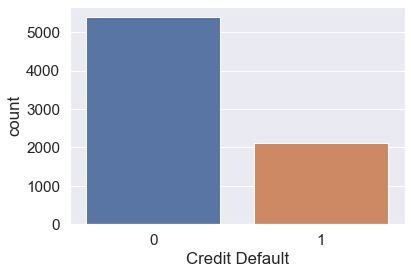

In [1910]:
sns.countplot(x='Credit Default', data=train_df)

In [1911]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

### –û–±–∑–æ—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [1912]:
cat_colnames = train_df.select_dtypes(include='object').columns.to_list()
cat_colnames

['Home Ownership', 'Years in current job', 'Purpose', 'Term']

In [1913]:
train_df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [1914]:
train_df['Years in current job'].value_counts().sort_index()

1 year        504
10+ years    2332
2 years       705
3 years       620
4 years       469
5 years       516
6 years       426
7 years       396
8 years       339
9 years       259
< 1 year      563
Name: Years in current job, dtype: int64

In [1915]:
train_df['Years in current job'].mode()

0    10+ years
dtype: object

In [1916]:
train_df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [1917]:
train_df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [1918]:
train_df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

### –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π

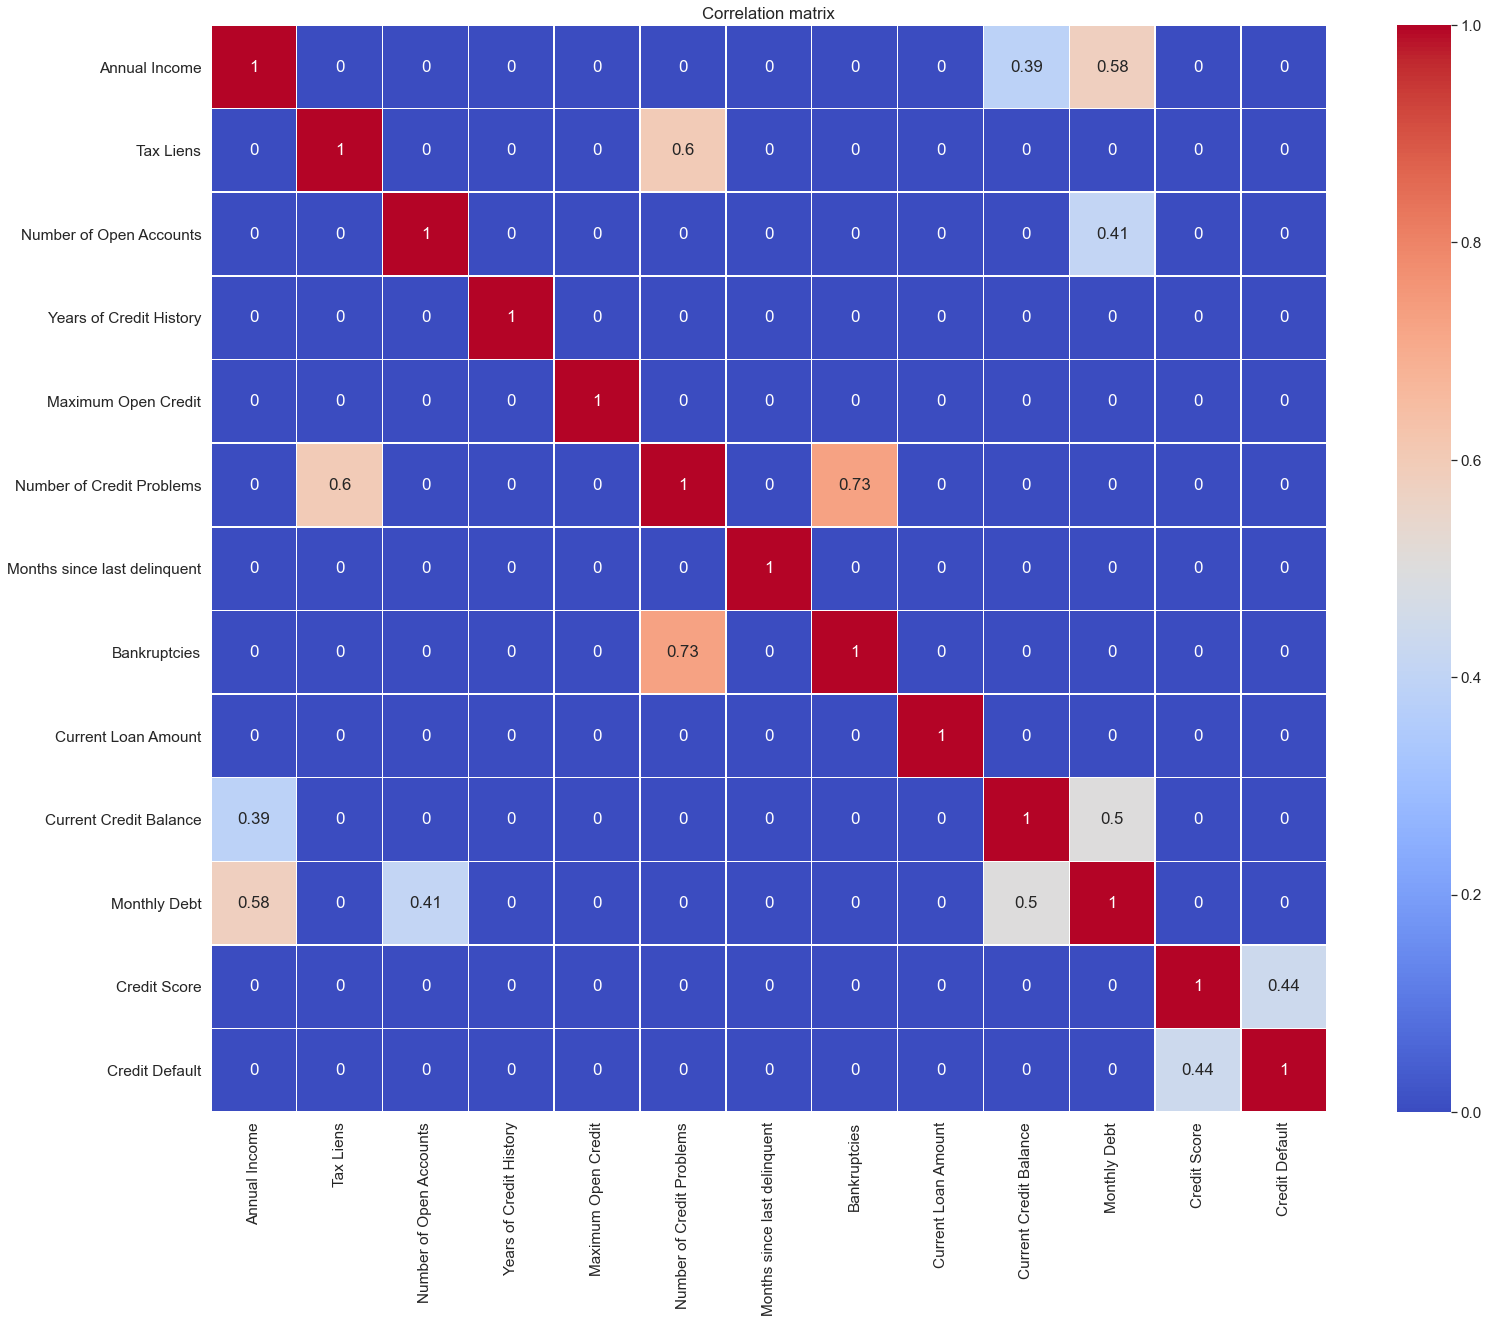

In [1919]:
plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

–ü–æ –º–∞—Ç—Ä–∏—Ü–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –≤–∏–¥–∏–º —É–≤–µ—Ä–µ–Ω–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é Annual Income (–≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥) —Å Monthly Debt(–ï–∂–µ–º–µ—Å—è—á–Ω—ã–π –¥–æ–ª–≥) –∏ –º–µ–Ω–µ–µ —Å–ª–∞–±—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å Current Credit Balance (—Ç–µ–∫—É—â–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –±–∞–ª–∞–Ω—Å - —Å—É–º–º–∞, –∫–æ—Ç–æ—Ä—É—é –º–æ–∂–µ—Ç —Ç—Ä–∞—Ç–∏—Ç—å –∫–ª–∏–µ–Ω—Ç —Å –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Å—á–µ—Ç–∞). –¢–∞–∫–∂–µ –µ—Å—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º Credit Score(+- 0.5 - —É–≤–µ—Ä–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è).
–ú–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Bankruptcies'(–ë–∞–Ω–∫—Ä–æ—Ç—Å—Ç–≤–æ) –∏ 'Number of credit problems'.
–ï—Å—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Credit Default –∏ Credit Score, Monthly Debt –∏ Number of Open Accounts, Monthly Debt –∏ Current Credit Balance.

In [1920]:
train_df.loc[train_df['Annual Income'].isnull() & train_df['Credit Score'].isnull()]

Home Ownership  Annual Income Years in current job  Tax Liens  \
5              Rent            NaN              7 years        0.0   
8     Home Mortgage            NaN              5 years        0.0   
9     Home Mortgage            NaN               1 year        0.0   
10    Home Mortgage            NaN             < 1 year        0.0   
16             Rent            NaN              7 years        0.0   
...             ...            ...                  ...        ...   
7482  Home Mortgage            NaN            10+ years        0.0   
7492  Home Mortgage            NaN            10+ years        0.0   
7494       Own Home            NaN             < 1 year        0.0   
7498  Home Mortgage            NaN                  NaN        0.0   
7499           Rent            NaN              4 years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
5                        12.0                     14.6             366784.0   
8                        17.0                     15.7                  0.0   
9                        10.0                     24.6             511302.0   
10                        7.0                     11.5             256322.0   
16                        6.0                     17.8             899492.0   
...                       ...                      ...                  ...   
7482                     14.0                     30.5             645062.0   
7492                     10.0                     13.3             423984.0   
7494                      7.0                      8.2             301554.0   
7498                     21.0                     26.5            1141250.0   
7499                      8.0                      9.4             480832.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
5                           0.0                           NaN           0.0   
8                           1.0                           NaN           1.0   
9                           0.0                           6.0           0.0   
10                          0.0                           NaN           0.0   
16                          0.0                           NaN           0.0   
...                         ...                           ...           ...   
7482                        0.0                          45.0           0.0   
7492                        0.0                           NaN           0.0   
7494                        0.0                           NaN           0.0   
7498                        0.0                           NaN           0.0   
7499                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
5                  other   Long Term             337304.0   
8      home improvements  Short Term             129734.0   
9     debt consolidation   Long Term             572880.0   
10    debt consolidation  Short Term             220858.0   
16    debt consolidation   Long Term             313038.0   
...                  ...         ...                  ...   
7482  debt consolidation  Short Term             188430.0   
7492  debt consolidation  Short Term             332948.0   
7494  debt consolidation  Short Term             290400.0   
7498  debt consolidation  Short Term             615274.0   
7499  debt consolidation  Short Term              26928.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
5                   165680.0       18692.0           NaN               1  
8                       19.0          17.0           NaN               0  
9                   205333.0       17613.0           NaN               1  
10                  187492.0       14592.0           NaN               0  
16                  538346.0       18844.0           NaN               1  
...                      ...           ...           ...             ...  
7482    

–ö–æ–≥–¥–∞ —É –ø—Ä–∏–∑–Ω–∞–∫–∞ Annual Income –ø—Ä–æ–ø—É—â–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–æ –∏ —É Credit Score —Ç–æ–∂–µ –ø—Ä–æ–ø—É—â–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ. –ü—Ä–µ–¥–ø–æ–ª–æ–∂—É, —á—Ç–æ —ç—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —á–µ–ª–æ–≤–µ–∫ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, –≥–æ–¥–æ–≤–æ–≥–æ –¥–æ—Ö–æ–¥–∞ –Ω–µ—Ç. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å Credit Score —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ.

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤.

#### –ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [1921]:
df_num_features = train_df.select_dtypes(include=['float64', 'int64'])
df_num_features

Annual Income  Tax Liens  Number of Open Accounts  \
0          482087.0        0.0                     11.0   
1         1025487.0        0.0                     15.0   
2          751412.0        0.0                     11.0   
3          805068.0        0.0                      8.0   
4          776264.0        0.0                     13.0   
...             ...        ...                      ...   
7495       402192.0        0.0                      3.0   
7496      1533984.0        0.0                     10.0   
7497      1878910.0        0.0                     12.0   
7498            NaN        0.0                     21.0   
7499            NaN        0.0                      8.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        26.3             685960.0                        1.0   
1                        15.3            1181730.0                        0.0   
2                        35.0            1182434.0                        0.0   
3                        22.5             147400.0                        1.0   
4                        13.6             385836.0                        1.0   
...                       ...                  ...                        ...   
7495                      8.5             107866.0                        0.0   
7496                     26.5             686312.0                        0.0   
7497                     32.1            1778920.0                        0.0   
7498                     26.5            1141250.0                        0.0   
7499                      9.4             480832.0                        0.0   

      Months since last delinquent  Bankruptcies  Current Loan Amount  \
0                              NaN           1.0           99999999.0   
1                              NaN           0.0             264968.0   
2                              NaN           0.0           99999999.0   
3                              NaN           1.0             121396.0   
4                              NaN           0.0             125840.0   
...                            ...           ...                  ...   
7495                           NaN           0.0             129360.0   
7496                          43.0           0.0             444048.0   
7497                           NaN           0.0           99999999.0   
7498                           NaN           0.0             615274.0   
7499                           NaN           0.0              26928.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                    47386.0        7914.0         749.0               0  
1                   394972.0       18373.0         737.0               1  
2                   308389.0       13651.0         742.0               0  
3                    95855.0       11338.0         694.0               0  
4                    93309.0        7180.0         719.0               0  
...                      ...           ...           ...             ...  
7495                 73492.0        1900.0         697.0               0  
7496                456399.0       12783.0        7410.0               1  
7497                477812.0       12479.0         748.0               0  
7498                476064.0       37118.0           NaN               0  
7499                288192.0        9061.0           NaN               0  

[7500 rows x 13 columns]

–£–¥–∞–ª–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞—Ö:

In [1922]:
df_num_features.drop(['Credit Default'], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'Annual Income'}>,
        <AxesSubplot:title={'center':'Tax Liens'}>,
        <AxesSubplot:title={'center':'Number of Open Accounts'}>],
       [<AxesSubplot:title={'center':'Years of Credit History'}>,
        <AxesSubplot:title={'center':'Maximum Open Credit'}>,
        <AxesSubplot:title={'center':'Number of Credit Problems'}>],
       [<AxesSubplot:title={'center':'Months since last delinquent'}>,
        <AxesSubplot:title={'center':'Bankruptcies'}>,
        <AxesSubplot:title={'center':'Current Loan Amount'}>],
       [<AxesSubplot:title={'center':'Current Credit Balance'}>,
        <AxesSubplot:title={'center':'Monthly Debt'}>,
        <AxesSubplot:title={'center':'Credit Score'}>]], dtype=object)

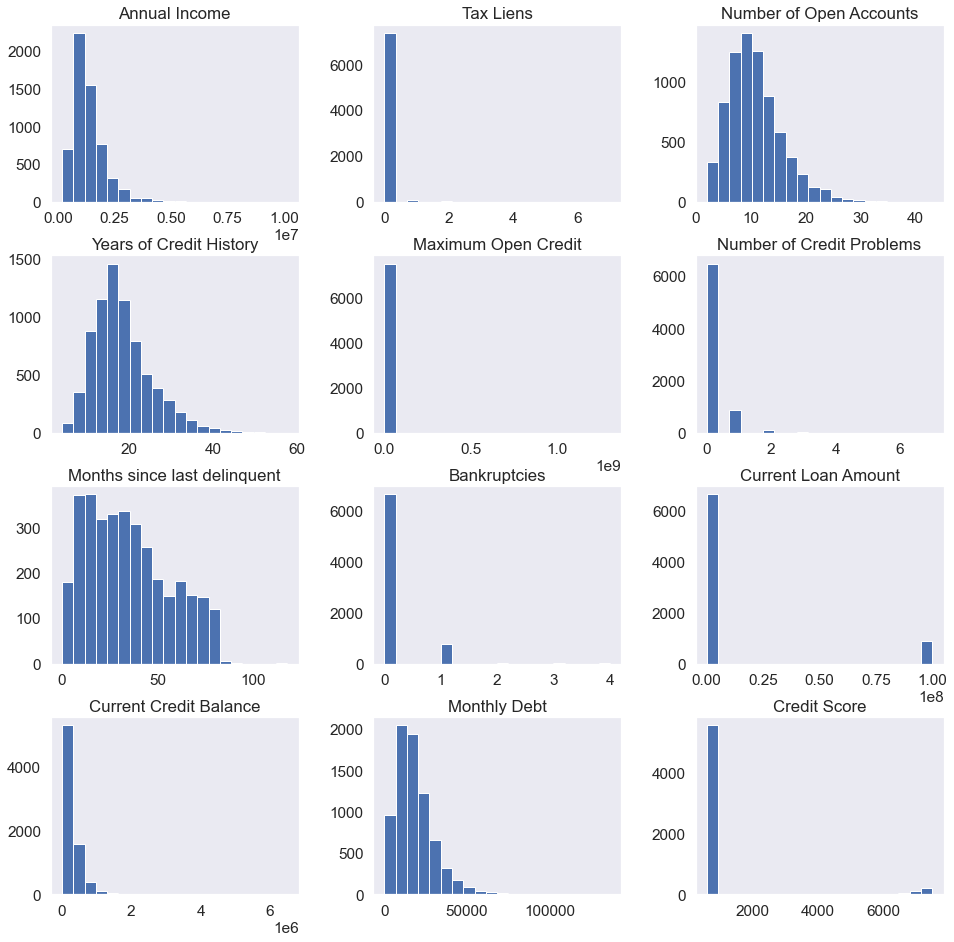

In [1923]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False)

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞—Ö –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—ã–±—Ä–æ—Å—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö Maximum Open Credit, Months since last deliquent, Current Loan Amount, Monthly Debt, Credit Score.

#### Current Loan Amount

In [1924]:
train_df['Current Loan Amount'].value_counts()

99999999.0    870
218064.0        6
89298.0         6
216106.0        5
265826.0        5
             ... 
104324.0        1
201080.0        1
427812.0        1
665544.0        1
191136.0        1
Name: Current Loan Amount, Length: 5386, dtype: int64

–ï—Å—Ç—å 870 –∑–Ω–∞—á–µ–Ω–∏–π, —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –Ω–∞ –º–∞–∫—Å–∏–º—É–º. –û—Ç–º–µ—Ç–∏–º —ç—Ç–∏ —Å—Ç–æ–ª–±—Ü—ã —á–µ—Ä–µ–∑ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ Current Loan Amount Outlier:

In [1925]:
train_df['Current Loan Amount Outlier'] = 0
train_df.loc[train_df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount Outlier'] = 1


In [1926]:
train_df.loc[(train_df['Current Loan Amount'] == 99999999.0) & train_df['Credit Default'] == 1]

Empty DataFrame
Columns: [Home Ownership, Annual Income, Years in current job, Tax Liens, Number of Open Accounts, Years of Credit History, Maximum Open Credit, Number of Credit Problems, Months since last delinquent, Bankruptcies, Purpose, Term, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score, Credit Default, Current Loan Amount Outlier]
Index: []

–ö–∞–∫ –≤–∏–¥–∏–º, —ç—Ç–∏–º –º–∞–∫—Å–∏–º—É–º–æ–º –æ—Ç–º–µ—á–µ–Ω—ã –¥–æ–±—Ä–æ—Å–æ–≤–µ—Å—Ç–Ω—ã–µ –ø–ª–∞—Ç–µ–ª—å—â–∏–∫–∏ –∫—Ä–µ–¥–∏—Ç–∞, –∑–Ω–∞—á–µ–Ω–∏—è 'Credit Score' —Ä–∞–≤–Ω–æ–≥–æ 1 —Å—Ä–µ–¥–∏ –Ω–∏—Ö –Ω–µ—Ç.

In [1927]:
train_df['Current Loan Amount'].median()

309573.0

In [1929]:
train_df[train_df['Current Loan Amount'] == 99999999.0]['Current Loan Amount'].count()

870

–û—Å—Ç–∞–≤–∏–º —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –±–µ–∑ –æ–±—Ä–∞–±–æ—Ç–∫–∏, –±—É–¥–µ—Ç –ø–æ–ª–µ–∑–Ω–æ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –±—É—Å—Ç–∏–Ω–≥-–º–æ–¥–µ–ª–∏.

#### Maximum Open Credit

In [2009]:
train_df['Maximum Open Credit'].max()

1304726170.0

–í–≤–µ–¥–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é max_credit - –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å —Ä–∞–≤–Ω—ã–π .95 –∫–≤–∞–Ω—Ç–∏–ª–µ–π, —á—Ç–æ–±—ã –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã, –∏ –≤—Å–µ, —á—Ç–æ –±–æ–ª—å—à–µ, –∑–∞–º–µ–Ω–∏–º –Ω–∞ –º–µ–¥–∏–∞–Ω—É.

In [6]:
max_credit = train_df['Maximum Open Credit'].quantile(.95)
max_credit

1706333.1999999997

In [2012]:
train_df['Maximum Open Credit'].median()

478159.0

In [7]:
train_df[train_df['Maximum Open Credit'] > max_credit]['Maximum Open Credit'].value_counts()

1887710.0    2
1713074.0    2
2644444.0    2
2075128.0    1
5590750.0    1
            ..
1757558.0    1
1789568.0    1
2260918.0    1
2002286.0    1
2178836.0    1
Name: Maximum Open Credit, Length: 372, dtype: int64

In [1935]:
train_df['Maximum Open Credit Outlier'] = 0
train_df.loc[train_df['Maximum Open Credit'] > max_credit, 'Maximum Open Credit Outlier'] = 1
train_df.loc[train_df['Maximum Open Credit'] > max_credit, 'Maximum Open Credit'] = train_df['Maximum Open Credit'].median()

In [1936]:
train_df[train_df['Maximum Open Credit Outlier'] == 1]

Home Ownership  Annual Income Years in current job  Tax Liens  \
44    Have Mortgage      1334256.0            10+ years        0.0   
617   Home Mortgage            NaN              3 years        0.0   
2617  Home Mortgage      3217802.0            10+ years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
44                       17.0                     15.4             478159.0   
617                      13.0                     27.5             478159.0   
2617                     12.0                     35.5             478159.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
44                          1.0                          35.0           0.0   
617                         0.0                           NaN           0.0   
2617                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
44           take a trip  Short Term              33110.0   
617   debt consolidation  Short Term             529892.0   
2617               other  Short Term              50116.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  \
44                  656450.0       34357.0         729.0               0   
617                1126814.0        5492.0           NaN               0   
2617               1834450.0       20272.0         750.0               0   

      Current Loan Amount Outlier  Maximum Open Credit Outlier  
44                              0                            1  
617                             0                            1  
2617                            0                            1

#### Months since last delinquent

In [1937]:
train_df['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

–í–∏–¥–∏–º, —á—Ç–æ –ø—Ä–æ–ø—É—â–µ–Ω–æ –±–æ–ª–µ–µ 50% –∑–Ω–∞—á–µ–Ω–∏–π, —ç—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –ø—Ä–æ—Å—Ä–æ—á–∫–∏ –ø–ª–∞—Ç–µ–∂–∞ –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–ª—è–º–∏ –≤ –ø–æ—Å–ª–µ–¥—É—é—â–µ–º.

#### Credit Score

In [1938]:
train_df['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [9]:
train_df.loc[train_df['Credit Score'] > 850, ['Credit Score']].count()

Credit Score    400
dtype: int64

In [1940]:
train_df['Credit Score'].median()

731.0

–°–æ–≥–ª–∞—Å–Ω–æ —Å–∏—Å—Ç–µ–º–µ –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Å–∫–æ—Ä–∏–Ω–≥–∞ FICO score, –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 300 –¥–æ 850 –∏ 0. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –≤—Å–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –≤—ã—à–µ 850 - —è–≤–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã. –ü–æ–º–µ—Ç–∏–º –∏—Ö —á–µ—Ä–µ–∑ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ Credit Score Outlier, –∞ –≤—ã–±—Ä–æ—Å—ã –æ–±—Ä–∞–±–æ—Ç–∞–µ–º —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: —Ä–∞–∑–¥–µ–ª–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª–µ–µ 1000 –Ω–∞ 10.

In [10]:
train_df['Credit Score Outlier'] = 0
train_df.loc[train_df['Credit Score'] > 850, 'Credit Score Outlier'] = 1
train_df.loc[train_df['Credit Score'] > 850, 'Credit Score'] = train_df.loc[train_df['Credit Score'] > 850, 'Credit Score']/10

#### Monthly Debt

In [1942]:
train_df['Monthly Debt'].quantile(.95)

40546.2

In [1943]:
train_df['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

In [1944]:
train_df['Monthly Debt'].median()

16076.5

–í–∏–¥–∏–º —è–≤–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –≤ –¥–∞–Ω–Ω–æ–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —Ä–µ–∞–ª—å–Ω—ã–µ —Ü–∏—Ñ—Ä—ã. –ù–æ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –ø–æ–ø—Ä–æ–±—É–µ–º –∑–∞–º–µ–Ω–∏—Ç—å —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –º–µ–¥–∏–∞–Ω—ã:

In [1945]:
train_df[train_df['Monthly Debt'] > train_df['Monthly Debt'].quantile(.95)]['Monthly Debt'].count()

375

In [1946]:
train_df.loc[train_df['Monthly Debt'] > train_df['Monthly Debt'].quantile(.95), 'Monthly Debt'] = train_df['Monthly Debt'].median()

In [1947]:
train_df['Monthly Debt'].describe()

count     7500.000000
mean     16524.408867
std       8661.900956
min          0.000000
25%      10067.500000
50%      16075.750000
75%      21938.500000
max      40546.000000
Name: Monthly Debt, dtype: float64

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [1948]:
train_df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
Current Loan Amount Outlier        0
Maximum Open Credit Outlier        0
Credit Score Outlier               0
dtype: int64

#### Annual Income

–ö–æ–≥–¥–∞ —É –ø—Ä–∏–∑–Ω–∞–∫–∞ Annual Income –ø—Ä–æ–ø—É—â–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–æ –∏ —É Credit Score —Ç–æ–∂–µ –ø—Ä–æ–ø—É—â–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ. –ü—Ä–µ–¥–ø–æ–ª–æ–∂—É, —á—Ç–æ —ç—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —á–µ–ª–æ–≤–µ–∫ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, –≥–æ–¥–æ–≤–æ–≥–æ –¥–æ—Ö–æ–¥–∞ –Ω–µ—Ç. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ Annual Income –∑–∞–º–µ–Ω–∏–º –Ω–∞ 1 (—á—Ç–æ–±—ã –ø–æ–º–µ—Ç–∏—Ç—å –µ–≥–æ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∞ —Ç–∞–∫–∂–µ –Ω–µ –≤—ã–∑–≤–∞—Ç—å –æ—à–∏–±–∫—É –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ–ª—å –ø—Ä–∏ —Ä–∞—Å—á–µ—Ç–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π).

In [1949]:
train_df['Annual Income'].fillna(1, inplace=True)

In [1950]:
train_df['Annual Income'].isna().sum()

0

#### Credit Score

##### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ Credit Score (–∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥). –ò–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞. 

Text(0.5, 0, 'Credit Score')

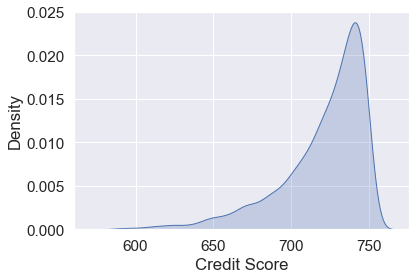

In [1951]:
sns.kdeplot(train_df['Credit Score'], shade=True, legend=False)
plt.xlabel('Credit Score')

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

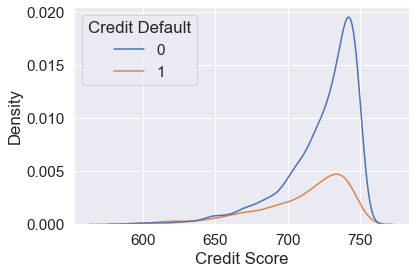

In [1952]:
sns.kdeplot(x='Credit Score', hue='Credit Default', data=train_df)

–í—ã–≤–æ–¥ - –≥—Ä—É–ø–ø—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ Credit Score –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∏–º–µ—é—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –∑–Ω–∞—á–∏—Ç, –∫—Ä–∏—Ç–µ—Ä–∏–π –≤–∞–∂–µ–Ω –∏ –º–µ–∂–¥—É Credit Score –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.
–ü—Ä–µ–¥–ø–æ–ª–æ–∂—É, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Credit Score –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ 0, —Ç–∞–∫ –∫–∞–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ Annual Income, –∞ –∑–Ω–∞—á–∏—Ç —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ. –ü–µ—Ä–µ–¥ —ç—Ç–∏–º —Å–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'Credit Score NaN', —á—Ç–æ–±—ã –ø–æ–º–µ—Ç–∏—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

In [1953]:
train_df['Credit Score'].median()

729.0

In [1954]:
train_df['Credit Score NaN'] = 0
train_df.loc[train_df['Credit Score'].isna(), 'Credit Score NaN'] = 1


In [1955]:
train_df['Credit Score'].fillna(0, inplace=True)

In [1956]:
train_df['Credit Score'].isna().sum()

0

#### Years in current job

–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ Years in current job (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–µ—Ç –Ω–∞ —Ç–µ–∫—É—â–µ–º –º–µ—Å—Ç–µ —Ä–∞–±–æ—Ç—ã) –º–æ–≥—É—Ç –æ–∑–Ω–∞—á–∞—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ —Ç–æ, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞ –µ—â–µ –∏–ª–∏ —É–∂–µ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç. –ü–æ–º–µ—Ç–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –∏ –∑–∞–º–µ–Ω–∏–º –Ω–∞ 0.

In [1957]:
train_df['Years in current job'].value_counts().sort_index()

1 year        504
10+ years    2332
2 years       705
3 years       620
4 years       469
5 years       516
6 years       426
7 years       396
8 years       339
9 years       259
< 1 year      563
Name: Years in current job, dtype: int64

In [1958]:
train_df['Years in current job'].isna().sum()

371

In [1959]:
train_df['Years in current job'].mode()[0]

'10+ years'

In [11]:
train_df['Years in current job NaN'] = 0
train_df.loc[train_df['Years in current job'].isna(), 'Years in current job NaN'] = 1
train_df['Years in current job'].fillna(0, inplace=True)

In [1961]:
train_df['Years in current job'].isna().sum()

0

#### Months since last delinquent

–ü—Ä–æ–ø—É—â–µ–Ω–æ –±–æ–ª–µ–µ 50% –∑–Ω–∞—á–µ–Ω–∏–π. –ü–æ–ø—Ä–æ–±—É–µ–º –æ—Ü–µ–Ω–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Density'>

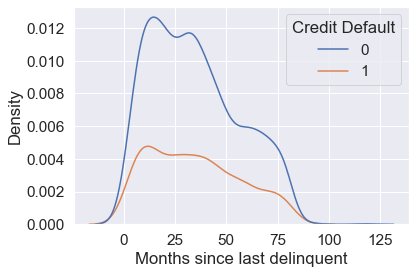

In [1962]:
sns.kdeplot(x='Months since last delinquent', hue='Credit Default', data=train_df)

–°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–ª–∏—è–Ω–∏–µ –µ—Å—Ç—å. –ü–æ–º–µ—Ç–∏–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —á–µ—Ä–µ–∑ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'Months since last delinquent NaN' –∏ –∑–∞–ø–æ–ª–Ω–∏–º –∏—Ö –Ω—É–ª—è–º–∏, –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–≤, —á—Ç–æ –ø—Ä–æ—Å—Ä–æ—á–∫–∏ –Ω–µ—Ç.

In [1963]:
train_df['Months since last delinquent NaN'] = 0
train_df.loc[train_df['Months since last delinquent'].isna(), 'Months since last delinquent NaN'] = 1

In [1964]:
train_df['Months since last delinquent'].fillna(0, inplace=True)

#### Bankruptcies

In [1965]:
train_df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

–≠—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.

In [1966]:
train_df['Bankruptcies'].isna().sum()

14

In [1967]:
train_df['Bankruptcies'].mode()[0]

0.0

–ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç–º–µ—Ç–∏–º —á–µ—Ä–µ–∑ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'Bankruptcies NaN' –∏ –∑–∞–º–µ–Ω–∏–º –∏—Ö –Ω–∞ –º–æ–¥—É.

In [1968]:
train_df['Bankruptcies'].isna().sum()

14

In [1969]:
train_df['Bankruptcies NaN'] = 0
train_df.loc[train_df['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
train_df['Bankruptcies'].fillna(train_df['Bankruptcies'].mode()[0], inplace=True)

#### Number of Credit Problems

In [1970]:
train_df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

–≠—Ç–æ —Ç–∞–∫–∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.

In [1971]:
train_df.isna().sum()

Home Ownership                      0
Annual Income                       0
Years in current job                0
Tax Liens                           0
Number of Open Accounts             0
Years of Credit History             0
Maximum Open Credit                 0
Number of Credit Problems           0
Months since last delinquent        0
Bankruptcies                        0
Purpose                             0
Term                                0
Current Loan Amount                 0
Current Credit Balance              0
Monthly Debt                        0
Credit Score                        0
Credit Default                      0
Current Loan Amount Outlier         0
Maximum Open Credit Outlier         0
Credit Score Outlier                0
Credit Score NaN                    0
Years in current job NaN            0
Months since last delinquent NaN    0
Bankruptcies NaN                    0
dtype: int64

–ü—Ä–æ–ø—É—Å–∫–æ–≤ –±–æ–ª—å—à–µ –Ω–µ—Ç.

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

#### Home Ownership

In [1972]:
train_df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

–°—Ä–∞–≤–Ω–∏–º –ø–æ–ø–∞—Ä–Ω–æ –¥–æ–ª–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ Home Ownership (–¥–æ–º–æ–≤–ª–∞–¥–µ–Ω–∏–µ):

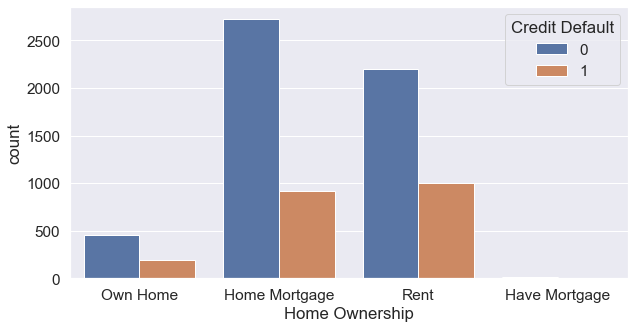

In [1973]:
plt.figure(figsize = (10, 5))
sns.countplot(x='Home Ownership', hue='Credit Default', data=train_df)
plt.legend(title='Credit Default', loc='upper right')

–ù–∞–±–ª—é–¥–µ–Ω–∏–µ

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è Own Home –∏ Rent –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Home Ownership' –∏–º–µ—é—Ç —Å—Ö–æ–∂–∏–µ –¥–æ–ª–∏ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ï—Å–ª–∏ —ç—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ç–∞–∫, —Ç–æ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä, –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –∏—Ö –≤ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é.

–ì–∏–ø–æ—Ç–µ–∑–∞

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã.

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã.

–ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞

–£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏  ùõº=0.05 

–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–¥–∞—Ç—å –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–π Own Home –∏ Rent –ø—Ä–∏–∑–Ω–∞–∫–∞ Home Owvership –≤ –≤—ã–±—Ä–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π, –ø–æ—Å–ª–µ —á–µ–≥–æ –æ—Ü–µ–Ω–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –¥–æ—Å—Ç–∏–≥–∞–µ–º–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ p-value –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å –µ–≥–æ —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º –ø–æ—Ä–æ–≥–æ–º –∞–ª—å—Ñ–∞. –ï—Å–ª–∏ p-value –ø–æ–ª—É—á–∏—Ç—Å—è –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –ø–æ—Ä–æ–≥–∞, —Ç–æ –≥–∏–ø–æ—Ç–µ–∑—É –æ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ —á–∞—Å—Ç–æ—Ç –º–æ–∂–Ω–æ –Ω–µ –æ—Ç–±—Ä–∞—Å—ã–≤–∞—Ç—å.

–°—Ñ–æ—Ä–º–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É –∏ —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã

In [1974]:
home_ownership_and_target = train_df.loc[train_df['Home Ownership'].isin(['Own Home', 'Rent']), ['Home Ownership', 'Credit Default']].sample(1000)
home_ownership_and_target['id'] = home_ownership_and_target.index

home_ownership_and_target

Home Ownership  Credit Default    id
6146           Rent               0  6146
534        Own Home               1   534
6239       Own Home               0  6239
5164           Rent               1  5164
7158           Rent               0  7158
...             ...             ...   ...
4082           Rent               0  4082
1974           Rent               1  1974
3507       Own Home               0  3507
2847           Rent               1  2847
5811           Rent               0  5811

[1000 rows x 3 columns]

In [1975]:
table = home_ownership_and_target.pivot_table(values='id', index='Home Ownership', columns='Credit Default', aggfunc='count')
table

Credit Default    0    1
Home Ownership          
Own Home        121   37
Rent            572  270

In [1976]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.03056131193798719

In [1977]:
p > 0.05

False

P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –¥–ª—è –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏—è –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã, –∞ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ Own Home –∏ Rent –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –∏—Ö –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é.

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞—à—É –≥–∏–ø–æ—Ç–µ–∑—É –∏ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–µ Own Home –∏ Have Mortgage (–Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –Ω–µ –≤–∏–¥–Ω–æ):

In [1978]:
home_ownership_and_target_1 = train_df.loc[train_df['Home Ownership'].isin(['Own Home', 'Have Mortgage']), ['Home Ownership', 'Credit Default']]
home_ownership_and_target_1['id'] = home_ownership_and_target_1.index

home_ownership_and_target_1

Home Ownership  Credit Default    id
0          Own Home               0     0
1          Own Home               1     1
3          Own Home               0     3
14         Own Home               0    14
23         Own Home               1    23
...             ...             ...   ...
7473       Own Home               0  7473
7474       Own Home               0  7474
7479       Own Home               0  7479
7490       Own Home               1  7490
7494       Own Home               0  7494

[659 rows x 3 columns]

In [1979]:
table_1 = home_ownership_and_target_1.pivot_table(values='id', index='Home Ownership', columns='Credit Default', aggfunc='count')
table_1

Credit Default    0    1
Home Ownership          
Have Mortgage    10    2
Own Home        455  192

In [1980]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.03056131193798719

In [1981]:
p > 0.05

False

P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –¥–ª—è –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏—è –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã, –∞ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ Own Home –∏ Have Mortgage —Ç–æ–∂–µ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –∏—Ö –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é.

In [1982]:
train_df.loc[train_df['Home Ownership'].isin(['Rent', 'Have Mortgage']), 'Home Ownership'] = 'Own Home'
train_df['Home Ownership'].value_counts()

Own Home         3863
Home Mortgage    3637
Name: Home Ownership, dtype: int64

–¢–µ–ø–µ—Ä—å –º–æ–∂–Ω–æ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ Home Ownership –≤ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫: Own Home - 1, Home Mortgage - 0:

In [1983]:
train_df['Home Ownership'] = train_df['Home Ownership'].map({'Own Home': 1, 'Home Mortgage': 0})
train_df.head(3)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0               1       482087.0            10+ years        0.0   
1               1      1025487.0            10+ years        0.0   
2               0       751412.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   

  Monthly Debt Credit Score  Credit Default  Current Loan Amount Outlier  \
0       7914.0        749.0               0                            1   
1      18373.0        737.0               1                            0   
2      13651.0        742.0               0                            1   

   Maximum Open Credit Outlier  Credit Score Outlier  Credit Score NaN  \
0                            0                     0                 0   
1                            0                     0                 0   
2                            0                     0                 0   

   Years in current job NaN  Months since last delinquent NaN  \
0                         1                                 1   
1                         0                                 1   
2                         0                                 1   

   Bankruptcies NaN  
0                 0  
1                 0  
2                 0  

[3 rows x 24 columns]

#### Term

In [1984]:
train_df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

–°—Ä–∞–≤–Ω–∏–º –¥–æ–ª–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ Term (—Å—Ä–æ–∫ –∫—Ä–µ–¥–∏—Ç–∞):


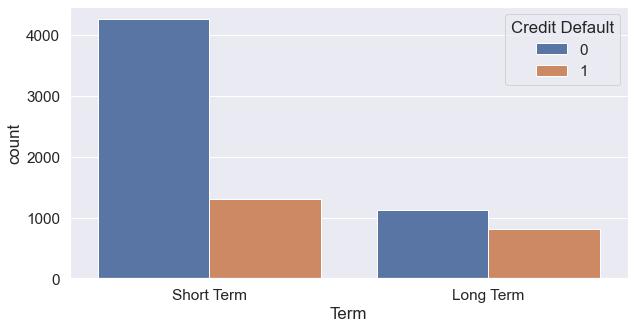

In [1985]:
plt.figure(figsize = (10, 5))
sns.countplot(x='Term', hue='Credit Default', data=train_df)
plt.legend(title='Credit Default', loc='upper right')

–°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –ø—Ä–∏–∑–Ω–∞–∫ Term —è–≤–ª—è–µ—Ç—Å—è —Å–∏–ª—å–Ω—ã–º, —Ç–∞–∫ –∫–∞–∫ –æ—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø—Ä–∏ —Ä–∞–∑–Ω–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ-—Ä–∞–∑–Ω–æ–º—É. –ü–µ—Ä–µ–≤–µ–¥–µ–º –µ–≥–æ –≤ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ Term: 1- Long Term, 0- Short Term:

In [1986]:
train_df['Term'] = train_df['Term'].map({'Long Term': 1, 'Short Term': 0})
train_df.head(3)

Home Ownership  Annual Income Years in current job  Tax Liens  \
0               1       482087.0            10+ years        0.0   
1               1      1025487.0            10+ years        0.0   
2               0       751412.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   

  Monthly Debt  Credit Score  Credit Default  Current Loan Amount Outlier  \
0       7914.0         749.0               0                            1   
1      18373.0         737.0               1                            0   
2      13651.0         742.0               0                            1   

   Maximum Open Credit Outlier  Credit Score Outlier  Credit Score NaN  \
0                            0                     0                 0   
1                            0                     0                 0   
2                            0                     0                 0   

   Years in current job NaN  Months since last delinquent NaN  \
0                         1                                 1   
1                         0                                 1   
2                         0                                 1   

   Bankruptcies NaN  
0                 0  
1                 0  
2                 0  

[3 rows x 24 columns]

#### Years in current job - —Å–¥–µ–ª–∞–µ–º —Ä–∞–∑–±–∏–≤–∫—É –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: 0, –¥–æ 3, 4-6, 7-9, 10+ –ª–µ—Ç

In [12]:
train_df['Years in current job'] = train_df['Years in current job'].map({'< 1 year':0, 
                                                                       '1 year':0, 
                                                                       '2 years':0, 
                                                                       '3 years':0, 
                                                                       '4 years':1, 
                                                                       '5 years':1, 
                                                                       '6 years':1, 
                                                                       '7 years':2,
                                                                       '8 years':2,
                                                                       '9 years':2,
                                                                       '10+ years':3,
                                                                        0 : 4})

In [1988]:
train_df.head(5)

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0               1       482087.0                     3        0.0   
1               1      1025487.0                     3        0.0   
2               0       751412.0                     2        0.0   
3               1       805068.0                     1        0.0   
4               1       776264.0                     2        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   
3                        1.0                           0.0           1.0  ...   
4                        1.0                           0.0           0.0  ...   

  Monthly Debt  Credit Score  Credit Default  Current Loan Amount Outlier  \
0       7914.0         749.0               0                            1   
1      18373.0         737.0               1                            0   
2      13651.0         742.0               0                            1   
3      11338.0         694.0               0                            0   
4       7180.0         719.0               0                            0   

   Maximum Open Credit Outlier  Credit Score Outlier  Credit Score NaN  \
0                            0                     0                 0   
1                            0                     0                 0   
2                            0                     0                 0   
3                            0                     0                 0   
4                            0                     0                 0   

   Years in current job NaN  Months since last delinquent NaN  \
0                         1                                 1   
1                         0                                 1   
2                         0                                 1   
3                         0                                 1   
4                         0                                 1   

   Bankruptcies NaN  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 24 columns]

#### Purpose

In [1989]:
train_df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

–ü—Ä–∏–º–µ–Ω–∏–º Label Encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ 'Purpose'. –î–ª—è —ç—Ç–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –ø—Ä–∏—Å–≤–æ–∏–º —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ –ø–æ —Å–ª–µ–¥—É—é—â–µ–º—É –ø—Ä–∏–Ω—Ü–∏–ø—É:
- 'debt consolidation' - 0, 'other' - 1, 'home improvements' - 2, 'business loan' - 3, 'buy a car' - 4.
- –¥–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ (<96 –æ–±—ä–µ–∫—Ç–æ–≤) –ø—Ä–∏—Å–≤–æ–∏–º —á–∏—Å–ª–æ 5.
- –¥–∞–ª–µ–µ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –±—É–¥–µ–º –≤–∫–ª—é—á–∞—Ç—å –≤ –º–æ–¥–µ–ª—å CatBoost, –∫–æ—Ç–æ—Ä–∞—è —É–º–µ–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏.

In [1990]:
train_df['Purpose'] = train_df['Purpose'].map({'debt consolidation':0, 
                                            'other':1, 
                                            'home improvements':2, 
                                            'business loan':3, 
                                            'buy a car':4, 
                                            'medical bills':5, 
                                            'major purchase':5, 
                                            'take a trip':5,
                                            'buy house':5,
                                            'small business':5,
                                            'wedding': 5,
                                            'moving': 5,
                                            'educational expenses': 5,
                                            'vacation': 5,
                                            'renewable energy': 5})
        
        
        

In [1991]:
train_df['Purpose'].value_counts()

0    5944
1     665
2     412
5     254
3     129
4      96
Name: Purpose, dtype: int64

#### Loan Repayment Period, Loan Payment Share, Net Debt

–î–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫—Ä–µ–¥–∏—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–∞:

- –ü–µ—Ä–∏–æ–¥ –≤—ã–ø–ª–∞—Ç—ã –∫—Ä–µ–¥–∏—Ç–∞ –∏–∑ –¥–æ—Ö–æ–¥–∞ (Loan Repayment Period) = –†–∞–∑–º–µ—Ä –∫—Ä–µ–¥–∏—Ç–∞ / –ì–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥
- –î–æ–ª—è –ø–ª–∞—Ç–µ–∂–∞ –ø–æ –∫—Ä–µ–¥–∏—Ç—É –≤ –¥–æ—Ö–æ–¥–µ (Loan Payment Share) = –ì–æ–¥–æ–≤–æ–π –ø–ª–∞—Ç–µ–∂ –ø–æ –∫—Ä–µ–¥–∏—Ç—É / –ì–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥
- –ß–∏—Å—Ç—ã–π –¥–æ–ª–≥ (Net Debt) = –†–∞–∑–º–µ—Ä –∫—Ä–µ–¥–∏—Ç–∞ - –†–∞–∑–º–µ—Ä –¥–æ—Ö–æ–¥–∞

In [1992]:
 # Loan Repayment Period
train_df['Loan Repayment Period'] = train_df['Current Loan Amount'] / train_df['Annual Income']
        
# Loan Payment Share        
train_df['Loan Payment Share'] = (train_df['Monthly Debt'] * 12) / train_df['Annual Income']
        
# Net Debt
train_df['Net Debt'] = train_df['Current Loan Amount'] - (train_df['Annual Income'] / 12)

#### Credit Score- –°–¥–µ–ª–∞–µ–º —Ä–∞–∑–±–∏–≤–∫—É —Ä–µ–π—Ç–∏–Ω–≥–∞ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:

    - Excellent: 800 to 850
    - Very Good: 740 to 799
    - Good: 670 to 739
    - Fair: 580 to 669
    - Poor: 300 to 579

In [1993]:
def credit_score_to_cat(X):
    bins = [300, 579, 669, 739, 799, 850]
    X['Credit Score Cat'] = pd.cut(X['Credit Score'], bins=bins, labels=False)
    
    X['Credit Score Cat'].fillna(-1, inplace=True)
    return X

In [1994]:
train_df = credit_score_to_cat(train_df)
train_df.head(3)

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0               1       482087.0                     3        0.0   
1               1      1025487.0                     3        0.0   
2               0       751412.0                     2        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   

   Maximum Open Credit Outlier  Credit Score Outlier  Credit Score NaN  \
0                            0                     0                 0   
1                            0                     0                 0   
2                            0                     0                 0   

   Years in current job NaN  Months since last delinquent NaN  \
0                         1                                 1   
1                         0                                 1   
2                         0                                 1   

   Bankruptcies NaN  Loan Repayment Period  Loan Payment Share      Net Debt  \
0                 0             207.431437            0.196993  9.995983e+07   
1                 0               0.258383            0.214996  1.795108e+05   
2                 0             133.082781            0.218006  9.993738e+07   

   Credit Score Cat  
0               3.0  
1               2.0  
2               3.0  

[3 rows x 28 columns]

In [1995]:
train_df['Credit Score'].max()

751.0

# –ö–ª–∞—Å—Å—ã –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –æ–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [379]:
class DataPreprocessing:
    
    def __init__(self):
        self.medians=None
        self.modes = None
        self.max_score = 850
        
        
    def fit(self, X):
        """–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫""" 
        X = X.copy()
        # –†–∞—Å—á–µ—Ç –º–µ–¥–∏–∞–Ω –∏ –º–æ–¥
        self.medians = X.median()
        self.modes = X.mode().loc[0]
        self.max_credit = X['Maximum Open Credit'].quantile(.95)
                
    def transform(self, X):
        """–¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö"""

        # Credit score
        X['Credit Score Outlier'] = 0
        X['Credit Score NaN'] = 0
        X.loc[X['Credit Score'] > self.max_score, 'Credit Score Outlier'] = 1
        X.loc[X['Credit Score'].isna(), 'Credit Score NaN'] = 1
        
        
        X.loc[X['Credit Score'] > self.max_score, 'Credit Score'] = \
                                X.loc[X['Credit Score'] > self.max_score, 'Credit Score'] / 10
        X['Credit Score'].fillna(0, inplace = True)
            
        # Current Loan Amount
        X['Current Loan Amount Outlier'] = 0
        X.loc[X['Current Loan Amount'] == 99999999.0, 'Current Loan Amount Outlier'] = 1
        
        # Maximum Open Credit
        X['Maximum Open Credit Outlier'] = 0
        X.loc[X['Maximum Open Credit'] > max_credit, 'Maximum Open Credit Outlier'] = 1
        X.loc[X['Maximum Open Credit'] > max_credit, 'Maximum Open Credit'] = X['Maximum Open Credit'].median()
               
        # Annual Income
        X['Annual Income'].fillna(1, inplace = True)
        
        #Monthly Debt
        X.loc[X['Monthly Debt'] > X['Monthly Debt'].quantile(.95), 'Monthly Debt'] = self.medians['Monthly Debt']
        
        # Years in current job
        X['Years in current job NaN'] = 0
        X.loc[X['Years in current job'].isna(), 'Years in current job NaN'] = 1
        X['Years in current job'].fillna(0, inplace = True)
        
        # Months since last delinquent
        
        X['Months since last delinquent NaN'] = 0
        X.loc[X['Months since last delinquent'].isna(), 'Months since last delinquent NaN'] = 1
        X['Months since last delinquent'].fillna(0, inplace=True)
        
        # Bankruptcies
        X['Bankruptcies NaN'] = 0
        X.loc[X['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
        X['Bankruptcies'].fillna(self.modes['Bankruptcies'], inplace = True)
        
        X.fillna(self.medians, inplace=True)
        
        return X

### –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [2043]:
class FeatureGenerator():
    """–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤—ã—Ö —Ñ–∏—á"""
    
      
    def fit(self, X, y=None):
        X = X.copy()
                
    def transform(self, X):
        
        #Home Ownership
        X.loc[X['Home Ownership'].isin(['Rent', 'Have Mortgage']), 'Home Ownership'] = 'Own Home'
        X['Home Ownership'] = X['Home Ownership'].map({'Own Home': 1, 'Home Mortgage': 0})
        
        # Term
        X['Term'] = X['Term'].map({'Long Term': 1, 'Short Term': 0})
                
        # Years in current job
        X['Years in current job'] = X['Years in current job'].map({'< 1 year':0, 
                                                                       '1 year':0, 
                                                                       '2 years':0, 
                                                                       '3 years':0, 
                                                                       '4 years':1, 
                                                                       '5 years':1, 
                                                                       '6 years':1, 
                                                                       '7 years':2,
                                                                       '8 years':2,
                                                                       '9 years':2,
                                                                       '10+ years':3,
                                                                  0:4})
        
        # Purpose
        
        X['Purpose'] = X['Purpose'].map({'debt consolidation':0, 
                                            'other':1, 
                                            'home improvements':2, 
                                            'business loan':3, 
                                            'buy a car':4, 
                                            'medical bills':5, 
                                            'major purchase':5, 
                                            'take a trip':5,
                                            'buy house':5,
                                            'small business':5,
                                            'wedding': 5,
                                            'moving': 5,
                                            'educational expenses': 5,
                                            'vacation': 5,
                                            'renewable energy': 5})
        
        
        
         # Loan Repayment Period 
            
        X['Loan Repayment Period'] = X['Current Loan Amount'] / X['Annual Income']
 
        # Loan Payment Share
        
        X['Loan Payment Share'] = (X['Monthly Debt'] * 12) / X['Annual Income']
        
        # Net Debt
        
        X['Net Debt'] = X['Current Loan Amount'] - (X['Annual Income'] / 12)
        
        # Credit Score
        X = self.credit_score_to_cat(X)
        
        return X
    
    def credit_score_to_cat(self, X):
        bins = [300, 579, 669, 739, 799, 850]
        X['Credit Score Cat'] = pd.cut(X['Credit Score'], bins=bins, labels=False)

        X['Credit Score Cat'].fillna(-1, inplace=True)
        X['Credit Score Cat'] = X['Credit Score Cat'].astype(np.int)
        
        return X

## –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [2028]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [380]:
num_feature_names = [
 'Annual Income',
'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
'Credit Score', 'Loan Repayment Period', 'Loan Payment Share', 'Net Debt']

In [381]:
cat_feature_names = [#'Tax Liens', 
    'Years in current job', 'Number of Credit Problems','Home Ownership', 
                     #'Bankruptcies', 
                     'Purpose', 'Credit Score Cat']

In [382]:
new_feature_names = ['Current Loan Amount Outlier',
 #'Maximum Open Credit Outlier',
 'Credit Score Outlier',
#'Credit Score NaN',
 'Years in current job NaN',
 #'Months since last delinquent NaN',
 #'Bankruptcies NaN'
]

target_name = 'Credit Default'

## –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train –∏ test

In [383]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)
X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [384]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [385]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X = preprocessor.transform(X)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape, X.shape

((5025, 23), (2475, 23), (2500, 23), (7500, 23))

In [386]:
features_gen = FeatureGenerator()
features_gen.fit(X_train, y_train)

X = features_gen.transform(X)
X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape, X.shape

((5025, 27), (2475, 27), (2500, 27), (7500, 27))

In [387]:
selected_feature_names = num_feature_names + new_feature_names + cat_feature_names
len(selected_feature_names)

20

In [388]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 3151 to 7270
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Home Ownership                    5025 non-null   int64  
 1   Annual Income                     5025 non-null   float64
 2   Years in current job              5025 non-null   int64  
 3   Tax Liens                         5025 non-null   float64
 4   Number of Open Accounts           5025 non-null   float64
 5   Years of Credit History           5025 non-null   float64
 6   Maximum Open Credit               5025 non-null   float64
 7   Number of Credit Problems         5025 non-null   float64
 8   Months since last delinquent      5025 non-null   float64
 9   Bankruptcies                      5025 non-null   float64
 10  Purpose                           5025 non-null   int64  
 11  Term                              5025 non-null   int64  
 12  Cur

In [389]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

–ü–µ—Ä–µ–≤–µ–¥–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫ —Ç–∏–ø—É int:

In [390]:
def float_to_int(X):
    for col in cat_feature_names:
        if X[col].dtypes == 'float64':
            X[col] = X[col].astype('int')        
    return X

In [391]:
X_train = float_to_int(X_train)
X_valid = float_to_int(X_valid)
X = float_to_int(X)
test_df = float_to_int(test_df)

In [392]:
X_train = X_train[selected_feature_names]
X_valid = X_valid[selected_feature_names]
X = X[selected_feature_names]
test_df = test_df[selected_feature_names]

In [393]:
test_df[cat_feature_names].dtypes

Years in current job         int64
Number of Credit Problems    int64
Home Ownership               int64
Purpose                      int64
Credit Score Cat             int64
dtype: object

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

–ü–æ—Å—Ç—Ä–æ–∏–º –±–∞–∑–æ–≤—É—é –º–æ–¥–µ–ª—å CatBoost:

In [2058]:
model_catb = catb.CatBoostClassifier(silent=True, 
                                     random_state=21, eval_metric='F1')

model_catb.fit(X_train, y_train, plot=True, eval_set=(X_valid, y_valid))

evaluate_preds(model_catb, X_train, X_valid, y_train, y_valid)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN
 0.913
TEST
 0.469
TRAIN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3631
           1       1.00      0.84      0.91      1394

    accuracy                           0.96      5025
   macro avg       0.97      0.92      0.94      5025
weighted avg       0.96      0.96      0.95      5025

VALID

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1756
           1       0.68      0.36      0.47       719

    accuracy                           0.76      2475
   macro avg       0.73      0.64      0.66      2475
weighted avg       0.75      0.76      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1633  123
1                461  258


In [2059]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (14, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()

    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

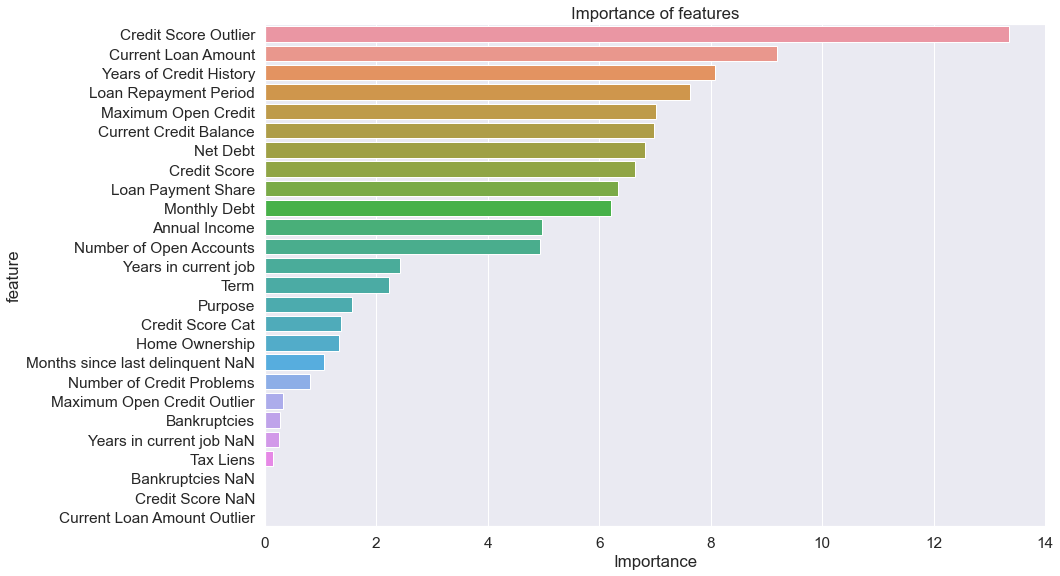

In [2060]:
important_features_top = show_feature_importances(X_train.columns, 
                                                  model_catb.feature_importances_, 
                                                  get_top=15)

–ò—Å–∫–ª—é—á–∏–º –∏–∑ –º–æ–¥–µ–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∏–∂–µ 1.

### –£–ª—É—á—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ CatBoost

In [394]:
cat_features = [i for i, col in enumerate(selected_feature_names) if col in cat_feature_names]
cat_features

[15, 16, 17, 18, 19]

In [395]:
scale = int(y_train[y_train == 0].shape[0] / y_train[y_train == 1].shape[0])
scale

2

In [396]:
X_train[selected_feature_names].iloc[:,cat_features].columns

Index(['Years in current job', 'Number of Credit Problems', 'Home Ownership',
       'Purpose', 'Credit Score Cat'],
      dtype='object')

### Cross Validation

In [2070]:
from catboost import Pool, cv

pool = Pool(data=X,
            label=y,
            cat_features=cat_features)

params = {"iterations": 1000,
          "depth": 4,
          "learning_rate": 0.1,
          "loss_function": "Logloss",
          "custom_loss": 'F1',
          "random_seed": 21,
          "verbose": False}

scores = cv(pool=pool,
            params=params,
            fold_count=3,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [2071]:
scores.head()

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.636122          0.002426            0.635780   
1           1           0.604746          0.001854            0.604202   
2           2           0.577000          0.006841            0.576201   
3           3           0.553096          0.004040            0.552355   
4           4           0.539363          0.004593            0.538335   

   train-Logloss-std  test-F1-mean  test-F1-std  train-F1-mean  train-F1-std  
0           0.002696      0.358660     0.075378       0.355990      0.063064  
1           0.001980      0.320483     0.010629       0.319607      0.005697  
2           0.007442      0.327370     0.020323       0.327429      0.013163  
3           0.004213      0.319163     0.009825       0.318997      0.006774  
4           0.004855      0.319285     0.009614       0.318997      0.006774

In [2072]:
best_value = np.max(scores['test-F1-mean'])
best_iter = np.argmax(scores['test-F1-mean'])

print('Best validation F1-score: {:.4f}¬±{:.4f} on step {}'.format(
    best_value,
    scores['test-F1-std'][best_iter],
    best_iter)
)

Best validation F1-score: 0.4580¬±0.0113 on step 942


### –í—ã–±–æ—Ä –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –∏ –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

#### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ RandomizedSearchCV

In [2073]:
params = {'n_estimators':[50, 100, 300],
          'max_depth':[2, 4, 6]
         }

In [2074]:
cv = KFold(n_splits=5, random_state=21, shuffle=True)

In [2075]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, random_state=21, n_jobs=-1)
rs.fit(X_train, y_train)

CPU times: user 811 ms, sys: 171 ms, total: 982 ms
Wall time: 7.87 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fa440cda520>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6],
                                        'n_estimators': [50, 100, 300]},
                   random_state=21, scoring='f1')

In [2076]:
rs.best_params_

{'n_estimators': 50, 'max_depth': 6}

In [2077]:
rs.best_score_

0.4670581416859127

#### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ CatBoost

In [2078]:
model_catb = catb.CatBoostClassifier(n_estimators=50,
                                     custom_loss=['F1'], 
                                     silent=True, 
                                     random_state=21)
grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth':[2, 4, 6], 'min_data_in_leaf':[2, 4, 5]
}
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_valid, label=y_valid)

grid_search_results = model_catb.grid_search(grid, train_pool, cv=5, stratified=True,
                                             verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.557469891
bestIteration = 49


bestTest = 0.4789584381
bestIteration = 49


bestTest = 0.4704527824
bestIteration = 49


bestTest = 0.5457135465
bestIteration = 49


bestTest = 0.4744675303
bestIteration = 49


bestTest = 0.465020268
bestIteration = 47


bestTest = 0.5408352965
bestIteration = 49


bestTest = 0.4696093822
bestIteration = 48


bestTest = 0.4676859593
bestIteration = 46


bestTest = 0.557469891
bestIteration = 49


bestTest = 0.4789584381
bestIteration = 49


bestTest = 0.4704527824
bestIteration = 49


bestTest = 0.5457135465
bestIteration = 49


bestTest = 0.4744675303
bestIteration = 49


bestTest = 0.465020268
bestIteration = 47


bestTest = 0.5408352965
bestIteration = 49


bestTest = 0.4696093822
bestIteration = 48


bestTest = 0.4676859593
bestIteration = 46


bestTest = 0.557469891
bestIteration = 49


bestTest = 0.4789584381
bestIteration = 49


bestTest = 0.4704527824
bestIteration = 49


bestTest = 0.5457135465
bestIteration = 49


bestTest = 0.4

In [2079]:
grid_search_results['params']

{'min_data_in_leaf': 2, 'depth': 4, 'learning_rate': 0.1}

In [398]:
final_model = catb.CatBoostClassifier(n_estimators=50, 
                                      max_depth=4, 
                                      scale_pos_weight=scale, cat_features=cat_features,
                                      silent=True, 
                                      random_state=21, 
                                      l2_leaf_reg=0.01,
                                      eval_metric='F1', # –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫—É
                                      learning_rate=0.1, use_best_model=True, min_data_in_leaf=2
                                     )
final_model.fit(X_train, y_train,
               eval_set=(X_valid, y_valid))

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3631
           1       0.62      0.52      0.57      1394

    accuracy                           0.78      5025
   macro avg       0.73      0.70      0.71      5025
weighted avg       0.77      0.78      0.77      5025

VALID

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1756
           1       0.57      0.46      0.51       719

    accuracy                           0.74      2475
   macro avg       0.68      0.66      0.67      2475
weighted avg       0.73      0.74      0.73      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1506  250
1                389  330


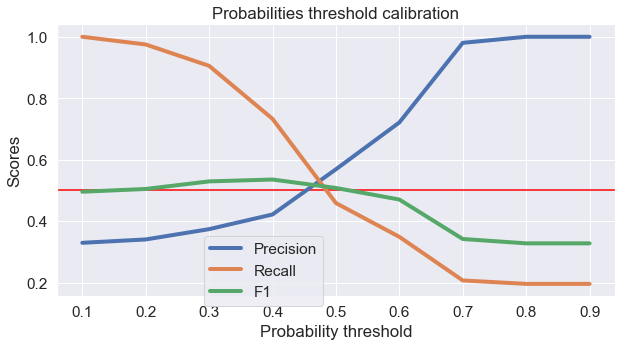

In [399]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
         
    figure = plt.figure(figsize = (10, 5))

    plt1 = figure.add_subplot(111)
    plt1.axhline(0.5, color="red")
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25));
    
y_valid_proba = final_model.predict_proba(X_valid)[:, 1]
show_proba_calibration_plots(y_valid_proba, y_valid)

In [404]:
y_valid_pred = np.array(y_valid_proba > 0.475, dtype=int)
get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3631
           1       0.62      0.52      0.57      1394

    accuracy                           0.78      5025
   macro avg       0.73      0.70      0.71      5025
weighted avg       0.77      0.78      0.77      5025

VALID

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1756
           1       0.53      0.53      0.53       719

    accuracy                           0.73      2475
   macro avg       0.67      0.67      0.67      2475
weighted avg       0.73      0.73      0.73      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1419  337
1                339  380


## –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏

In [405]:
test_df.shape

(2500, 20)

In [406]:
predict_proba = final_model.predict_proba(test_df)[:, 1]
predict_proba

array([0.48163234, 0.31663287, 0.98582664, ..., 0.40885067, 0.3382235 ,
       0.98905642])

In [411]:
len(predict_proba)

2500

In [412]:
predictions = np.array(predict_proba > 0.47, dtype=int)
predictions

array([1, 0, 1, ..., 0, 0, 1])

In [413]:
pd.DataFrame(predictions).to_csv('NMakarevich_predictions2.csv', header=None, index=None)